# Projeto para reconhecimento do estágio de desenvolvimento de Culturas de Soja

Esse projeto foi desenvolvido para disciplina de Deep Learning, e o objetivo é utilizar o TensorFlow/Keras para reconhecer o estágio de desenvolvimento de plantações de soja, tomando como base um conjunto de imagens ilustrativas fornecidas pela Bayer. A maior parte do código foi baseada no vídeo que se encontra no link: https://www.youtube.com/watch?v=jztwpsIzEGc

# 1. Configurações Básicas

In [3]:
!pip install tensorflow opencv-python matplotlib

In [4]:
!pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.3
anaconda-pro

In [5]:
import tensorflow as tf
import os

has_used_regularization = False

In [6]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0']


In [7]:
tf.config.list_physical_devices('GPU') # Por enquanto, minha GPU não está sendo detectada. Vou tentar fazer sem mesmo

[]

# 2. Importando e tratando as imagens

In [9]:
import numpy as np
from matplotlib import pyplot as plt

data_dir = 'data' 

In [10]:
# Definindo uma pipeline para importar as imagens (assim não precisam ser todas salvas em memória de uma vez)

data_train = tf.keras.utils.image_dataset_from_directory(
    'data/TRN',
    image_size=(256, 256),
    batch_size=32
)

Found 13104 files belonging to 8 classes.


In [11]:
# Definindo uma pipeline para importar as imagens (assim não precisam ser todas salvas em memória de uma vez)

data_test = tf.keras.utils.image_dataset_from_directory(
    'data/TST',
    image_size=(256, 256),
    batch_size=32
)

Found 6552 files belonging to 8 classes.


In [12]:
data_val = tf.keras.utils.image_dataset_from_directory(
    'data/VAL',
    image_size=(256, 256),
    batch_size=32
)

Found 2184 files belonging to 8 classes.


In [13]:
# Definindo um iterator para cada pipeline. 
# Esses objetos serão usados para "puxar" um batch novo de imagens para memória sempre que necessário

data_train_iterator = data_train.as_numpy_iterator()
data_test_iterator = data_test.as_numpy_iterator()
data_val_iterator = data_val.as_numpy_iterator()

In [14]:
# Por exemplo, vou puxar um batch da base de imagens para treino

batch = data_train_iterator.next()

In [15]:
# O batch é um tupla formada por uma lista de valores 
# (que são as imagens importadas em memória no formato de uma lista de listas com três elementos - cores BGR - do NumPy) 
# E uma lista de rótulos, que se referem a pasta (e futuramente, classificação) da imagem

# As cores estão no formato BGR porque esse é o padrão do NumPy, o que exige uma conversão posterior (geralmente)

print(batch[0]) # matrizes NumPy que representam as imagens

[[[[199.        174.        139.       ]
   [189.29297   163.32227   129.29297  ]
   [175.6836    148.73242   116.634766 ]
   ...
   [165.04883   137.         99.04883  ]
   [166.0586    137.0293    100.0293   ]
   [168.        138.        101.       ]]

  [[164.60156   138.67188   102.74219  ]
   [158.50433   132.5064     98.44986  ]
   [152.96254   126.89566    93.02942  ]
   ...
   [171.51125   142.62352   105.55664  ]
   [171.60948   143.48264   106.50987  ]
   [172.64844   142.64844   106.578125 ]]

  [[139.04688   113.046875   77.92969  ]
   [134.93655   108.936554   74.046875 ]
   [138.4537    113.29341    70.013535 ]
   ...
   [177.33998   149.22852   112.18541  ]
   [178.15726   150.12453   112.24515  ]
   [177.41406   148.29688   110.53125  ]]

  ...

  [[180.23438   154.23438   117.11719  ]
   [179.26367   153.37743   116.146484 ]
   [182.08789   157.04478   118.9707   ]
   ...
   [117.828094  108.832      26.569733 ]
   [125.18335   110.392334   49.5912   ]
   [136.95312   

In [16]:
print(batch[1]) # rótulos que representam as categorias

[6 2 7 3 4 5 3 7 0 4 3 6 2 1 1 1 0 3 2 6 4 0 5 1 3 4 2 6 5 6 2 3]


In [17]:
len(batch[0]) # cada batch importa 32 imagens 

32

In [18]:
print(batch[0][0][0][0]) # um pixel

[199. 174. 139.]


In [19]:
len(batch[0][0][0]) # uma linha de pixels da imagem

256

In [20]:
len(batch[0][0]) # uma lista de linhas - ou seja, a imagem

256

In [21]:
# Visualizando algumas imagens

fig, ax = plt.subplots(ncols=4, figsize=(251,244))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [22]:
# Regularizando os valores para o intervalo de 0 a 1

data_train = data_train.map(lambda x,y: (x/255, y))
data_train = data_train.shuffle(32, reshuffle_each_iteration=True) 

data_test = data_test.map(lambda x,y: (x/255, y))
data_test = data_test.shuffle(32, reshuffle_each_iteration=True) 

data_val = data_val.map(lambda x,y: (x/255, y))

# print(data_test_iterator[0])

In [23]:
# Usando one-hot encoding para definir as labels corretamente

from tensorflow.keras.utils import to_categorical

def preprocess_labels(image, label):
    label_one_hot = to_categorical(label, num_classes=8)
    return image, label_one_hot

data_train = data_train.map(preprocess_labels)
data_val = data_val.map(preprocess_labels)

In [24]:
# Pegando um batch após a normalização

data_train_iterator = data_train.as_numpy_iterator()
data_test_iterator = data_test.as_numpy_iterator()
data_val_iterator = data_val.as_numpy_iterator()

In [25]:
batch_train = data_train_iterator.next()
batch_test = data_test_iterator.next()
batch_val = data_val_iterator.next()

In [26]:
print(f'Os valores estão entre {batch_train[0].min()} e {batch_test[0].max()}')

Os valores estão entre 0.0 e 0.9963071346282959


# 3. Gerando as bases de validação e outras transformações

In [28]:
# Caminhos para as pastas de treino e teste

train_dir = os.path.join('data', 'TRN')
test_dir = os.path.join('data', 'TST')

In [29]:
val_dir = os.path.join('data', 'VAL')
os.makedirs(val_dir, exist_ok=True)

for i in range(1,9):
    os.makedirs(os.path.join(val_dir, str(i)), exist_ok=True)

In [30]:
files_train = os.listdir(os.path.join(train_dir, '1'));
len(files_train)

1638

In [31]:
files_test = os.listdir(os.path.join(test_dir, '1'));
len(files_test)

819

In [32]:
files_val = os.listdir(os.path.join(val_dir, '1'));
len(files_val)

273

In [33]:
length_files_train = len(files_train)
length_files_teste = len(files_test)
length_files_val = len(files_val)

In [34]:
'''
import os
import shutil
import random

# Para cada categoria, pegar um número específico de imagens para validação
categories = os.listdir(train_dir)

for category in ['1', '2', '3', '4', '5', '6', '7', '8']:
    # Caminhos para as categorias de treino e teste
    train_category_dir = os.path.join(train_dir, category)
    test_category_dir = os.path.join(test_dir, category)
    
    # Listar as imagens de cada categoria
    train_images = os.listdir(train_category_dir)
    test_images = os.listdir(test_category_dir)

    # Pegar as 50 primeiras imagens de treino e 100 imagens de teste
    val_train_images = random.sample(train_images, int(0.1*length_arquivos_treino))
    val_test_images = random.sample(test_images, int(0.1*length_arquivos_teste))

    # Embaralhar as imagens para garantir aleatoriedade
    val_images = val_train_images + val_test_images
    random.shuffle(val_images)

    # Criar a pasta de validação da categoria, se não existir
    val_category_dir = os.path.join(val_dir, category)
    os.makedirs(val_category_dir, exist_ok=True)

    # Mover as imagens de treino e teste para a pasta de validação
    for image in val_images:
        # Caminho completo da imagem
        if image in val_train_images:
            src = os.path.join(train_category_dir, image)
        else:
            src = os.path.join(test_category_dir, image)
        
        dst = os.path.join(val_category_dir, image)
        
        # Mover para a pasta de validação
        shutil.move(src, dst)

print("Conjunto de validação criado com sucesso!")
'''

'\nimport os\nimport shutil\nimport random\n\n# Para cada categoria, pegar um número específico de imagens para validação\ncategories = os.listdir(train_dir)\n\nfor category in [\'1\', \'2\', \'3\', \'4\', \'5\', \'6\', \'7\', \'8\']:\n    # Caminhos para as categorias de treino e teste\n    train_category_dir = os.path.join(train_dir, category)\n    test_category_dir = os.path.join(test_dir, category)\n    \n    # Listar as imagens de cada categoria\n    train_images = os.listdir(train_category_dir)\n    test_images = os.listdir(test_category_dir)\n\n    # Pegar as 50 primeiras imagens de treino e 100 imagens de teste\n    val_train_images = random.sample(train_images, int(0.1*length_arquivos_treino))\n    val_test_images = random.sample(test_images, int(0.1*length_arquivos_teste))\n\n    # Embaralhar as imagens para garantir aleatoriedade\n    val_images = val_train_images + val_test_images\n    random.shuffle(val_images)\n\n    # Criar a pasta de validação da categoria, se não exist

# 4. Construindo o Modelo de Deep Learning

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [37]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape=(256,256,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(8, activation='softmax'))

C:\Dev\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,698,424 (14.11 MB)

 Trainable params: 3,698,424 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

# 5. Treinando o Modelo

In [41]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(
    data_train,
    epochs=20,
    validation_data=data_val,
    callbacks=[tensorboard_callback]
)

Epoch 1/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 86s 206ms/step - accuracy: 0.6938 - loss: 0.7522 - val_accuracy: 0.9721 - val_loss: 0.0913
Epoch 2/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 84s 204ms/step - accuracy: 0.9818 - loss: 0.0460 - val_accuracy: 0.9794 - val_loss: 0.0552
Epoch 3/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 92s 222ms/step - accuracy: 0.9913 - loss: 0.0228 - val_accuracy: 0.9858 - val_loss: 0.0317
Epoch 4/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 104s 253ms/step - accuracy: 0.9884 - loss: 0.0321 - val_accuracy: 0.9904 - val_loss: 0.0320
Epoch 5/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 100s 241ms/step - accuracy: 0.9899 - loss: 0.0343 - val_accuracy: 0.9853 - val_loss: 0.0415
Epoch 6/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 113s 274ms/step - accuracy: 0.9917 - loss: 0.0202 - val_accuracy: 0.9927 - val_loss: 0.0136
Epoch 7/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 106s 256ms/step - accuracy: 0.9980 - loss: 0.0069 - val_accuracy: 0.9945 - val_loss: 0.0132
Epoch 8/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 94s 228ms/step - accuracy: 0.9967 - los

# 5. Estatísticas do Resultado

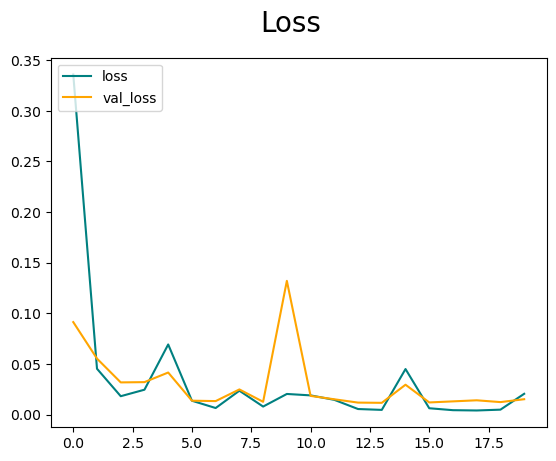

In [43]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

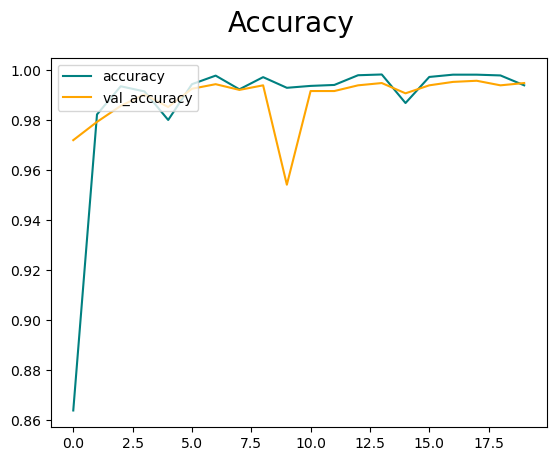

In [44]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 6. Testando o Modelo diretamente

## Reconhecendo uma imagem de categoria 1

In [49]:
import cv2

# Importando uma imagem da categoria 1 para testar o funcionamento

def getImage(path):
    img = cv2.imread(path)
    resize = tf.image.resize(img, (256,256))
    resize = tf.clip_by_value(resize, 0.0, 255.0)
    resize = tf.cast(resize, tf.uint8)
    return resize

def showImage(resize):
    rgb_img = cv2.cvtColor(resize.numpy(), cv2.COLOR_BGR2RGB)
    
    plt.imshow(rgb_img)
    plt.show() 

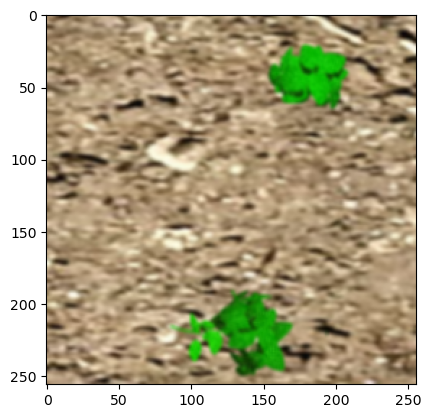

In [51]:
image_test1 = getImage('test/test_category1.png')
showImage(image_test1)

In [53]:
# Função para prever a categoria da imagem. Os detalhes da estrutura dela estão nas linhas abaixo

def predictCategory(image): 
    yhat = model.predict(np.expand_dims(image/255, 0))
    predicted_class = np.argmax(yhat) + 1
    print(f'A classe prevista é: {predicted_class}')

In [57]:
# Verificar a previsão realizada pelo modelo
# É retornado um vetor com 8 valores, que representam a "probabilidade" da imagem pertencer a cada categoria

yhat = model.predict(np.expand_dims(image_test1/255, 0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[9.9995649e-01, 5.4424287e-08, 1.9320661e-09, 1.8823056e-09,
        6.8170183e-12, 1.5327559e-11, 7.9086661e-08, 4.3295528e-05]],
      dtype=float32)

In [59]:
# Pegando a classe com maior probabilidade

predicted_class = np.argmax(yhat) + 1
print(f'A classe prevista é: {predicted_class}')

A classe prevista é: 1


## Reconhecendo uma imagem de categoria 2

In [61]:
image_test2 = getImage('test/test_category2.png')

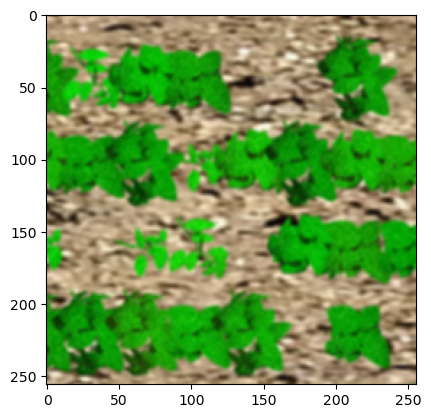

In [63]:
showImage(image_test2)

In [65]:
predictCategory(image_test2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
A classe prevista é: 2


## Reconhecendo uma imagem de categoria 3

In [67]:
image_test3 = getImage('test/test_category3.png')

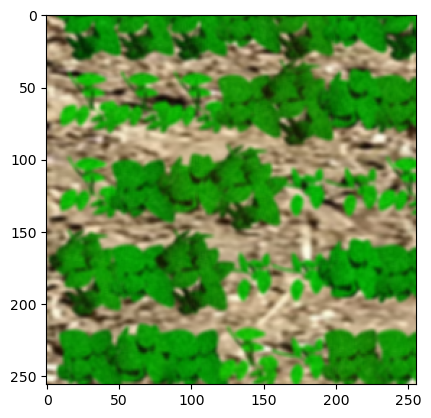

In [69]:
showImage(image_test3)

In [71]:
predictCategory(image_test3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
A classe prevista é: 3


## Reconhecendo uma imagem de categoria 4

In [73]:
image_test4 = getImage('test/test_category4.png')

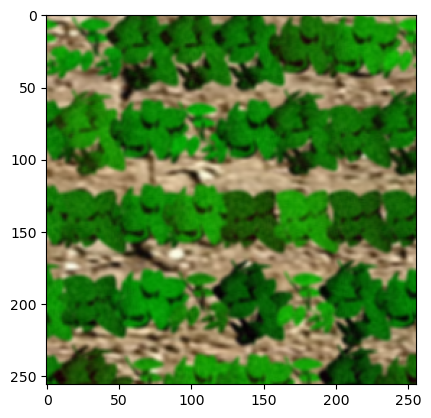

In [75]:
showImage(image_test4)

In [77]:
predictCategory(image_test4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
A classe prevista é: 4


## Reconhecendo uma imagem de categoria 5

In [79]:
image_test5 = getImage('test/test_category5.png')

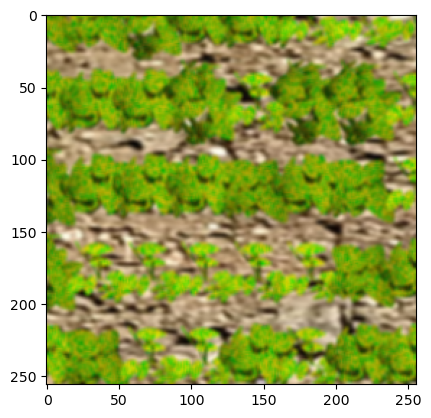

In [81]:
showImage(image_test5)

In [83]:
predictCategory(image_test5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
A classe prevista é: 2


## Reconhecendo uma imagem de categoria 6

In [85]:
image_test6 = getImage('test/test_category6.png')

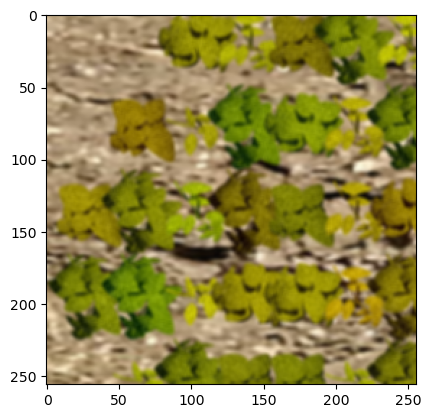

In [87]:
showImage(image_test6)

In [89]:
predictCategory(image_test6)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
A classe prevista é: 1


## Reconhecendo uma imagem de categoria 7

In [91]:
image_test7 = getImage('test/test_category7.png')

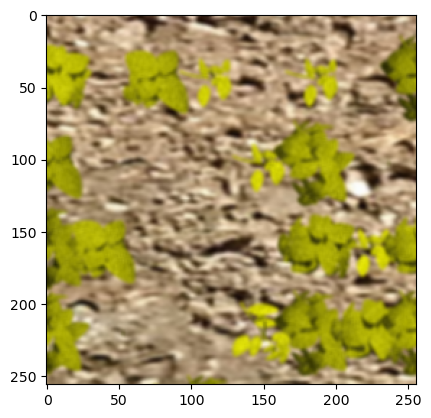

In [93]:
showImage(image_test7)

In [95]:
predictCategory(image_test7)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
A classe prevista é: 1


## Reconhecendo uma imagem de categoria 8

In [97]:
image_test8 = getImage('test/test_category8.png')

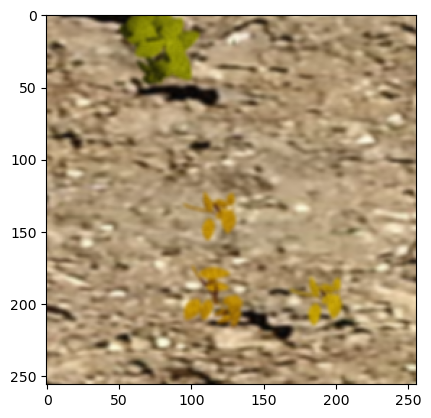

In [99]:
showImage(image_test8)

In [101]:
predictCategory(image_test8)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
A classe prevista é: 1
